In [ ]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
from ucimlrepo import fetch_ucirepo
aids_data = fetch_ucirepo(id=890)
df = pd.concat([aids_data.data.features, aids_data.data.targets], axis=1)

# Basic info
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # Peek at the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

| Column   | Description |
|----------|------------|
| **time** | Time in study (days) |
| **trt** | Treatment indicator (1 = treated, 0 = control) |
| **age** | Age of patient |
| **wtkg** | Weight in kg |
| **hemo** | Hemoglobin level |
| **homo** | Homozygous gene presence (binary) |
| **drugs** | Prior IV drug use (binary) |
| **karnof** | Karnofsky score (measures patient's functional status) |
| **oprior** | Number of prior opportunistic infections |
| **z30** | Indicator for 30-day event |
| **zprior** | Number of prior AZT treatments |
| **preanti** | Pre-antiretroviral therapy indicator |
| **race** | Race category |
| **gender** | Gender category (1 = male, 2 = female) |
| **str2** | Stratification variable |
| **strat** | Another stratification variable |
| **symptom** | Presence of symptoms (binary) |
| **treat** | Treatment assignment (binary) |
| **offtrt** | Whether patient went off treatment |
| **cd40** | CD4 count at baseline |


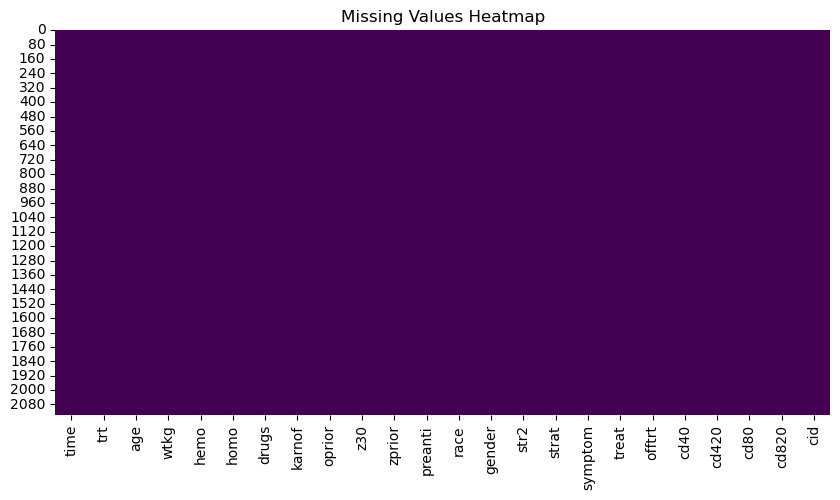

In [3]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


No missing values in the datset.

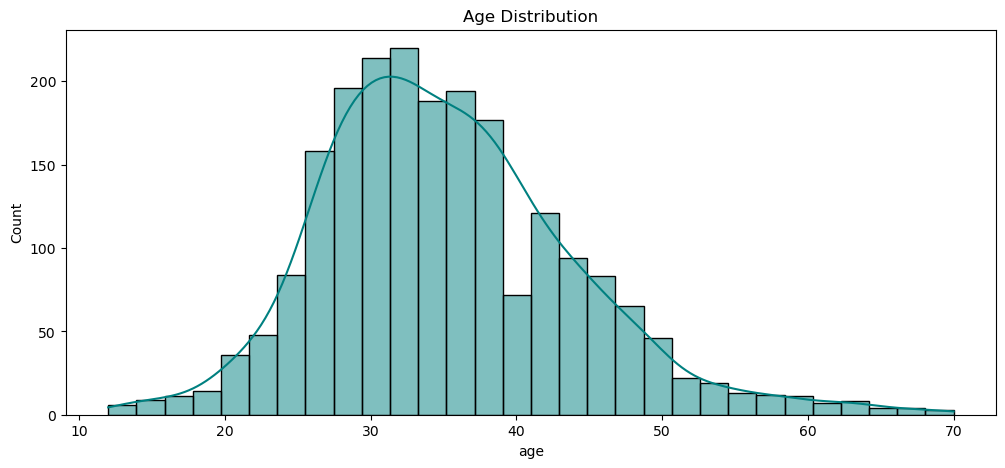

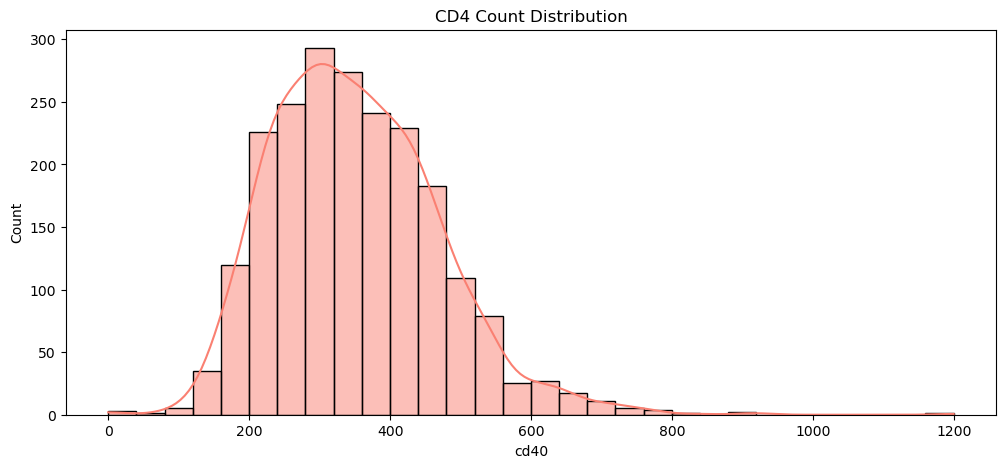

In [4]:
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=30, kde=True, color="teal")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['cd40'], bins=30, kde=True, color="salmon")
plt.title("CD4 Count Distribution")
plt.show()


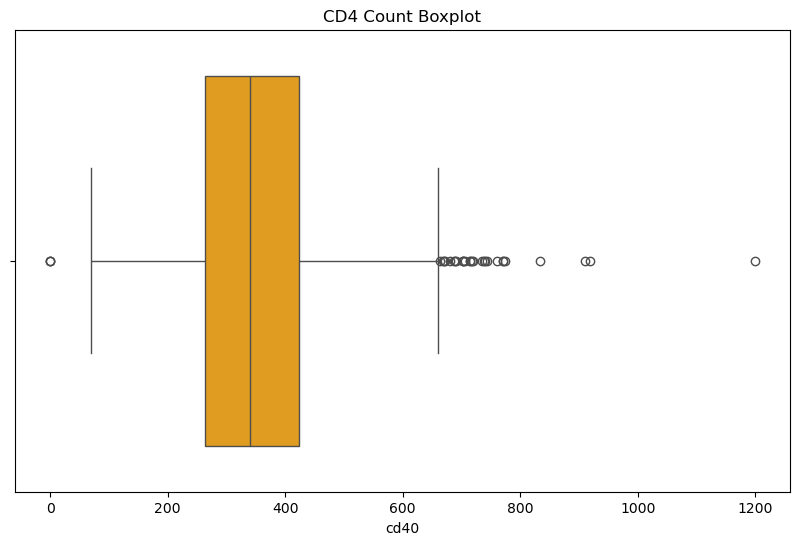

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["cd40"], color="orange")
plt.title("CD4 Count Boxplot")
plt.show()


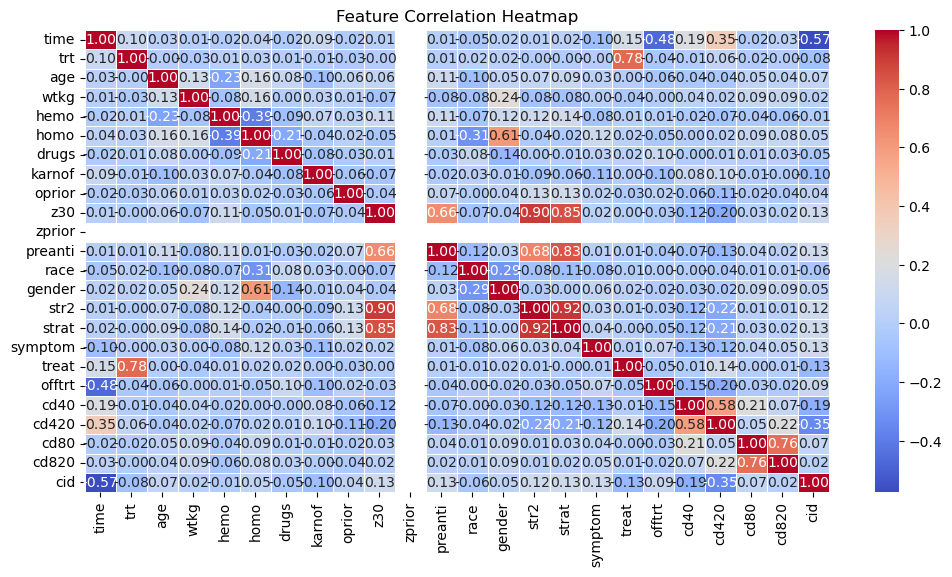

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


/var/folders/rz/m9y4lv2543b4h866w76_dhv40000gn/T/ipykernel_48118/207209674.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["treat"], y=df["cd40"], palette="coolwarm")


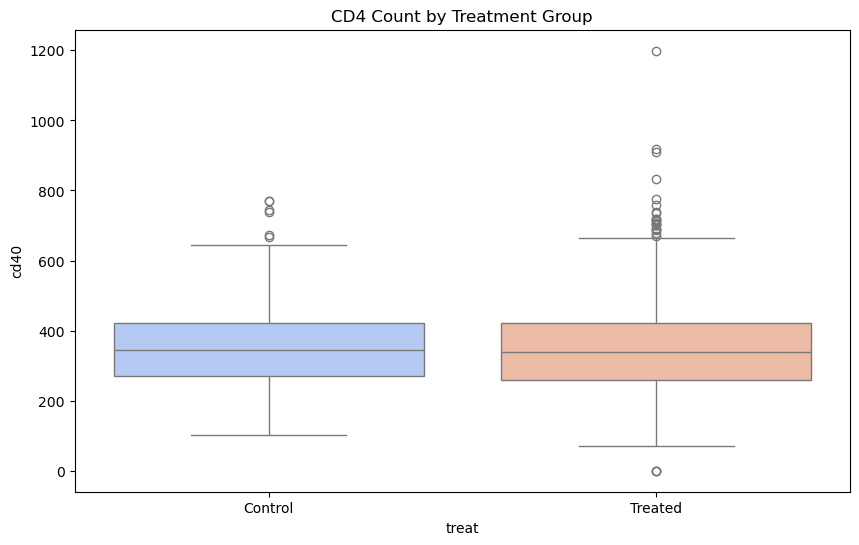

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["treat"], y=df["cd40"], palette="coolwarm")
plt.xticks([0,1], ['Control', 'Treated'])  # Rename categories
plt.title("CD4 Count by Treatment Group")
plt.show()


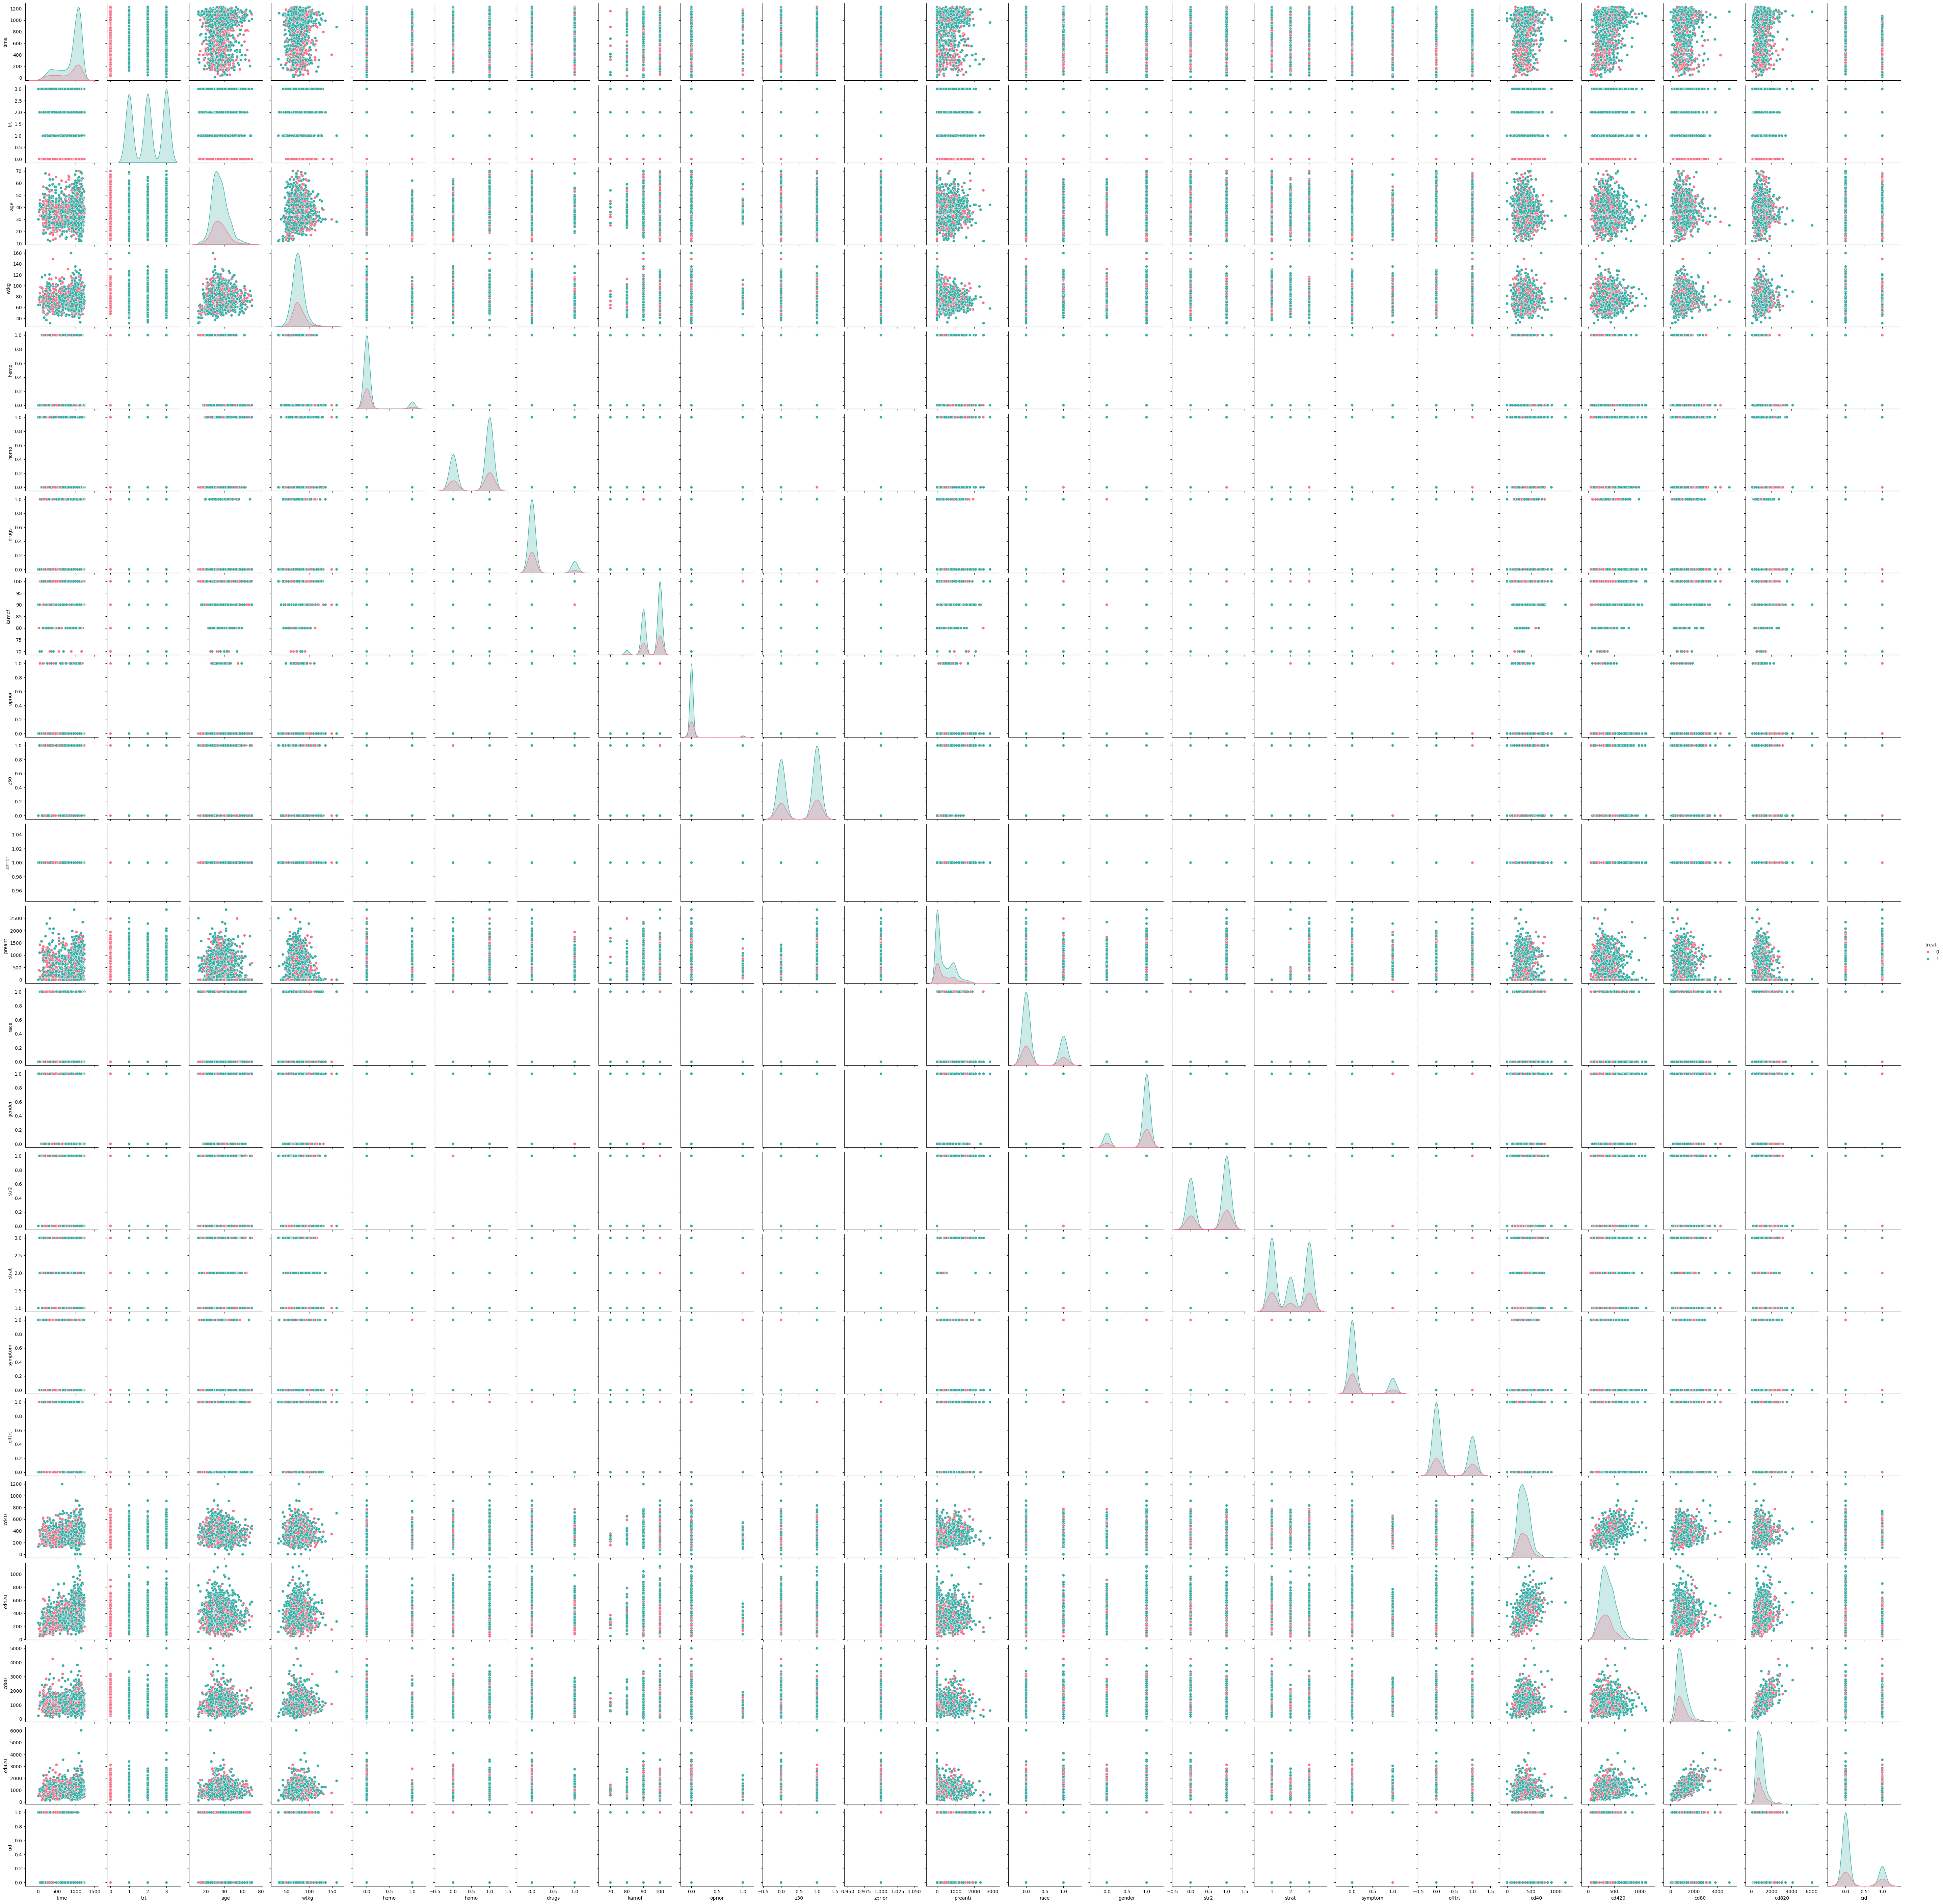

In [8]:
sns.pairplot(df, hue="treat", diag_kind="kde", palette="husl")
plt.show()


In [10]:
import plotly.express as px

fig = px.scatter(df, x="age", y="cd40", color="treat",
                 title="Age vs. CD4 Count by Treatment Group",
                 labels={"treat": "Treatment Group", "cd40": "CD4 Count"})
fig.show()


Random Forest Classifier

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8808411214953271
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       327
           1       0.86      0.59      0.70       101

    accuracy                           0.88       428
   macro avg       0.87      0.78      0.81       428
weighted avg       0.88      0.88      0.87       428



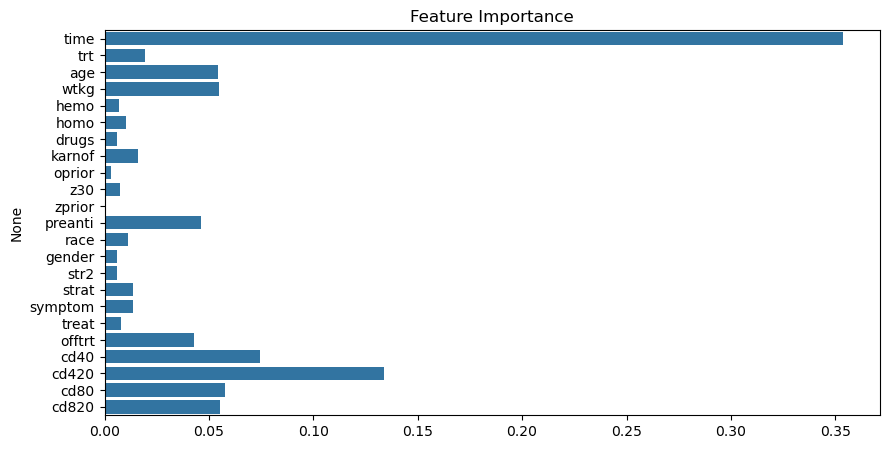

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
from ucimlrepo import fetch_ucirepo
aids_data = fetch_ucirepo(id=890)
X = aids_data.data.features
y = aids_data.data.targets

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance visualization
plt.figure(figsize=(10,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


XGBoost

Accuracy: 0.8925233644859814
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       327
           1       0.84      0.67      0.75       101

    accuracy                           0.89       428
   macro avg       0.87      0.82      0.84       428
weighted avg       0.89      0.89      0.89       428



/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning:

[22:48:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




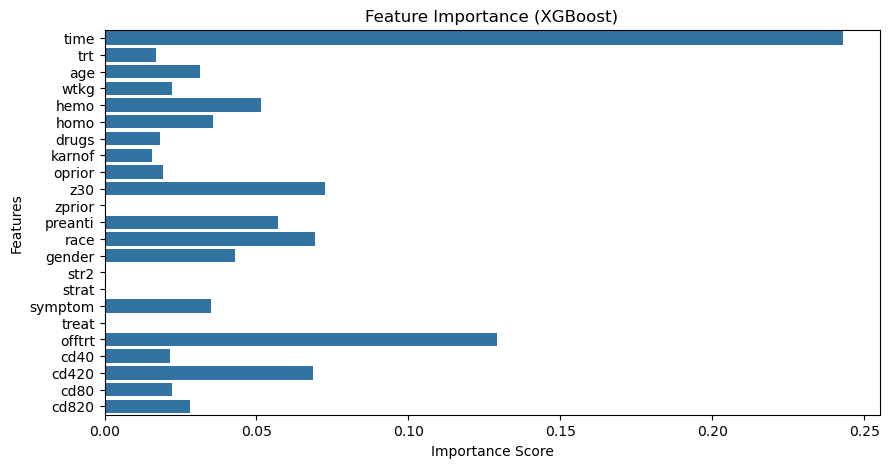

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Import XGBoost classifier
from ucimlrepo import fetch_ucirepo

# Load dataset
aids_data = fetch_ucirepo(id=890)
X = aids_data.data.features
y = aids_data.data.targets

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance visualization
plt.figure(figsize=(10,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


F1-score is especially important in healthcare when both precision and recall are important, and there is a need to balance the cost of false positives and false negatives. A lower recall can mean that patients with the disease are missed (leading to worse outcomes), while a lower precision can mean unnecessary treatments or tests for patients who don't have the condition.

In your case:

Class 0 (no disease): Precision = 0.89, Recall = 0.97, F1 = 0.93

The model does a great job of correctly identifying patients who don’t have the disease and missing very few actual negatives.

Class 1 (disease): Precision = 0.86, Recall = 0.59, F1 = 0.70

Here, recall is lower, which means the model misses more actual positive cases (diseased patients). The precision is still good, but the lower recall may be a concern since missing cases could lead to undiagnosed patients.